In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import join, isfile
from PIL import Image
import cv2
import fnmatch

In [4]:
cytoPath = '/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/segmentationNPYfiles/scan1_WellA1/cyto'
nucleiPath = '/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/segmentationNPYfiles/scan1_WellA1/nuclei'


In [6]:
cytoFolders = [x[0] for x in os.walk(cytoPath)]
cytoFolders = sorted(foldersCyto)

In [7]:
nucleiFolders= [x[0] for x in os.walk(nucleiPath)]
nucleiFolders = sorted(nucleiFolders)

In [10]:
nucleiFolders

['/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/segmentationNPYfiles/scan1_WellA1/nuclei',
 '/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/segmentationNPYfiles/scan1_WellA1/nuclei/R4_DAPI_Subregion_100_r10_c10',
 '/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/segmentationNPYfiles/scan1_WellA1/nuclei/R4_DAPI_Subregion_10_r1_c10',
 '/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/segmentationNPYfiles/scan1_WellA1/nuclei/R4_DAPI_Subregion_11_r2_c1',
 '/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/segmentationNPYfiles/scan1_WellA1/nuclei/R4_DAPI_Subregion_12_r2_c2',
 '/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/segmentationNPYfiles/scan1_WellA1/nuclei/R4_DAPI_Subregion_13_r2_c3',
 '/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/s

In [ ]:
os.chdir(cytoPath)
files = [f for f in listdir(cytoPath) if isfile(join(cytoPath, f))]
datafolderCyto = [np.load(f, allow_pickle=True).item() for f in files ]
os.chdir(nucleiPath)
files = [f for f in listdir(nucleiPath) if isfile(join(nucleiPath, f))]
datafolderNuclei = [np.load(f, allow_pickle=True).item() for f in files ]

In [18]:
xLengthMax, yLengthMax = 512, 512

(array([2342., 3981., 2795., 1570.,  703.,  294.,  112.,   40.,   13.,
           4.]),
 array([ 47. ,  82.4, 117.8, 153.2, 188.6, 224. , 259.4, 294.8, 330.2,
        365.6, 401. ]),
 <BarContainer object of 10 artists>)

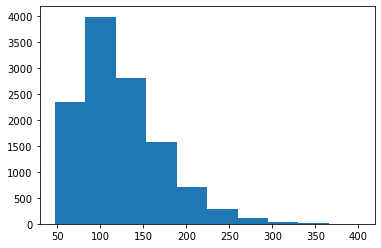

In [21]:
plt.hist(lengths)

In [22]:
list = np.arange(1,8)

In [27]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [28]:
lengths = []

for r in range(2,11):
    for c in range(1,11):
        if (r != 0) & (c!=0):
            pattern = "*r" + str(r) +"_c" + str(c)
            cytoFolder = fnmatch.filter(cytoFolders, pattern)
            nucleiFolder = fnmatch.filter(nucleiFolders, pattern)

            os.chdir(cytoFolder[0])
            files = [f for f in listdir(cytoFolder[0]) if isfile(join(cytoFolder[0], f))]
            cytoDatafolder = [np.load(f, allow_pickle=True).item() for f in files ]
            os.chdir(nucleiFolder[0])
            files = [f for f in listdir(nucleiFolder[0]) if isfile(join(nucleiFolder[0], f))]
            nucleiDatafolder = [np.load(f, allow_pickle=True).item() for f in files ]

            for i in range(len(cytoDatafolder)):
                data = cytoDatafolder[i]
                cytoMasks = data['masks']
                cytoValues = np.unique(cytoMasks)
                data = nucleiDatafolder[i]
                nucleiMasks = data['masks']
                nucleiValues = np.unique(nucleiMasks)

                minCoord = np.arange(10)
                maxCoordy = np.arange(cytoMasks.shape[0] - 11, cytoMasks.shape[0])
                maxCoordx = np.arange(cytoMasks.shape[1] - 11, cytoMasks.shape[1])

                for j in cytoValues:
                    if j!= 0:
                        cytoMask = np.where(cytoMasks == j)
                        nucleiInCyto = np.unique(nucleiMasks[cytoMask[0], cytoMask[1]])
                        if len(nucleiInCyto[nucleiInCyto != 0]) == 1:
                            nucleiID = nucleiInCyto[nucleiInCyto != 0][0]
                            nucleiCoord = np.where(nucleiMasks == nucleiID)
                            if len(np.unique(cytoMasks[nucleiCoord[0], nucleiCoord[1]])) == 1:
                                fullImageCyto = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')
                                fullImageNuclei = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')
                                empty = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')

                                xmin, ymin = cytoMask[1].min(), cytoMask[0].min()
                                xmax, ymax = cytoMask[1].max(), cytoMask[0].max()
                                if  ((xmax -xmin) <= xLengthMax) & ((ymax -ymin) <= yLengthMax) & (xmin not in minCoord) & (ymin not in minCoord) & (xmax not in maxCoordx) & (ymax not in maxCoordy):
                                    if ((xmax -xmin) >= (ymax -ymin)):
                                        lengths.append((xmax -xmin))
                                    else:
                                        lengths.append((ymax -ymin))

                                    cellImage = cytoMasks[ymin:ymax, xmin:xmax].copy()
                                    cellImage[cellImage != j] = 0
                                    cellImage[cellImage == j] = 255
                                    cellImage = np.asarray(cellImage, dtype = 'uint8')

                                    nucleiImage = nucleiMasks[ymin:ymax, xmin:xmax].copy()
                                    nucleiImage[nucleiImage != nucleiID] = 0
                                    nucleiImage[nucleiImage == nucleiID] = 255
                                    nucleiImage = np.asarray(nucleiImage, dtype = 'uint8')


                                    xshift, yshift = int((xLengthMax - xmax + xmin)/2), int((yLengthMax - ymax + ymin)/2)
                                    fullImageCyto[yshift:yshift + ymax - ymin, xshift: xshift + xmax - xmin] = cellImage
                                    fullImageNuclei[yshift:yshift + ymax - ymin, xshift: xshift + xmax - xmin] = nucleiImage
                                    mergeFullImage = cv2.merge([fullImageCyto, fullImageNuclei, empty])
                                    im = Image.fromarray(mergeFullImage)
                                    filename =  'SingleCellImage_r' + str(r) + '_c' + str(c) + '_n' + str(j) + '.png'
                                    os.chdir('/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/singleCellImagesNuclei/scan1_WellA1')
                                    im.save(filename)

IndexError: list index out of range

In [14]:
dataCyto = datafolderCyto[0]
masksCyto = dataCyto['masks']
valuesCyto = np.unique(masksCyto)
maskCyto = np.where(masksCyto == 300)

In [16]:
dataNuclei = datafolderNuclei[0]
masksNuclei = dataNuclei['masks']


In [17]:
np.unique(masksCyto[maskCyto[0], maskCyto[1]])

array([300], dtype=uint16)

In [29]:
fullImage = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')

In [39]:
numbers = np.unique(masksNuclei[maskCyto[0], maskCyto[1]])

In [42]:
numbers = numbers[numbers != 0][1]

In [43]:
numbers

401

In [26]:
imageNuclei = dataNuclei['img']

In [44]:
mask401 = np.where(masksNuclei != 401)

In [45]:
imageNucleiTest = imageNuclei.copy()

In [46]:
imageNucleiTest[mask401[0], mask401[1]] = 0

In [51]:
imageNucleiTest.max()

4245

In [28]:
imageNuclei[mask401[0], mask401[1]]

array([2134, 2077, 2015, ..., 2654, 2599, 2530], dtype=uint16)

In [25]:
if(len(numbers) == 1):
    print(True)
else:
    print(False)

False


In [4]:
os.chdir('/Users/jones/Downloads/test')

In [6]:
data = datafolderCyto[0]
masksCyto = data['masks']
valuesCyto = np.unique(masksCyto)
data = datafolderNuclei[0]
masksNuclei = data['masks']
values = np.unique(masksCyto)

In [10]:
maxCoordx = np.arange(masksCyto.shape[1] - 11, masksCyto.shape[1])

In [11]:
maxCoordx

array([7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7145])

In [7]:
masksCyto.shape[1]

7146

In [12]:
#nuclei and cyto merged
lengths = []
for i in range(len(datafolderCyto)):
    data = datafolderCyto[i]
    masksCyto = data['masks']
    valuesCyto = np.unique(masksCyto)
    data = datafolderNuclei[i]
    masksNuclei = data['masks']
    values = np.unique(masksCyto)

    minCoord = np.arange(10)
    maxCoordy = np.arange(masksCyto.shape[0] - 11, masksCyto.shape[0])
    maxCoordx = np.arange(masksCyto.shape[1] - 11, masksCyto.shape[1])
    for j in values:
        if j!= 0:
            maskCyto = np.where(masksCyto == j)
            nucleiInCyto = np.unique(masksNuclei[maskCyto[0], maskCyto[1]])
            if len(nucleiInCyto[nucleiInCyto != 0]) == 1:
                nucleiID = nucleiInCyto[nucleiInCyto != 0][0]
                nucleiCoord = np.where(masksNuclei == nucleiID)
                if len(np.unique(masksCyto[nucleiCoord[0], nucleiCoord[1]])) == 1:
                    fullImageCyto = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')
                    fullImageNuclei = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')
                    empty = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')

                    xmin, ymin = maskCyto[1].min(), maskCyto[0].min()
                    xmax, ymax = maskCyto[1].max(), maskCyto[0].max()
                    if  ((xmax -xmin) <= xLengthMax) & ((ymax -ymin) <= yLengthMax) & (xmin not in minCoord) & (ymin not in minCoord) & (xmax not in maxCoordx) & (ymax not in maxCoordy):
                        if ((xmax -xmin) >= (ymax -ymin)):
                            lengths.append((xmax -xmin))
                        else:
                            lengths.append((ymax -ymin))

                        cellImage = masksCyto[ymin:ymax, xmin:xmax].copy()
                        cellImage[cellImage != j] = 0
                        cellImage[cellImage == j] = 255
                        cellImage = np.asarray(cellImage, dtype = 'uint8')

                        nucleiImage = masksNuclei[ymin:ymax, xmin:xmax].copy()
                        nucleiImage[nucleiImage != nucleiID] = 0
                        nucleiImage[nucleiImage == nucleiID] = 255
                        nucleiImage = np.asarray(nucleiImage, dtype = 'uint8')


                        xshift, yshift = int((xLengthMax - xmax + xmin)/2), int((yLengthMax - ymax + ymin)/2)
                        fullImageCyto[yshift:yshift + ymax - ymin, xshift: xshift + xmax - xmin] = cellImage
                        fullImageNuclei[yshift:yshift + ymax - ymin, xshift: xshift + xmax - xmin] = nucleiImage
                        mergeFullImage = cv2.merge([fullImageCyto, fullImageNuclei, empty])
                        im = Image.fromarray(mergeFullImage)
                        filename =  'SingleCellImage' + str(j) + '.png'
                        im.save(filename)

(array([455., 781., 390., 206., 127.,  45.,  21.,  10.,   3.,   3.]),
 array([ 47. ,  72.7,  98.4, 124.1, 149.8, 175.5, 201.2, 226.9, 252.6,
        278.3, 304. ]),
 <BarContainer object of 10 artists>)

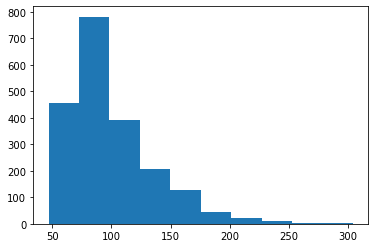

In [13]:
plt.hist(lengths)

In [5]:
data = datafolderCyto[0]
masksCyto = data['masks']
valuesCyto = np.unique(masksCyto)
data = datafolderNuclei[0]
masksNuclei = data['masks']
j = 52

In [16]:
maskCyto = np.where(masksCyto == j)
nucleiInCyto = np.unique(masksNuclei[maskCyto[0], maskCyto[1]])
if len(nucleiInCyto[nucleiInCyto != 0]) == 1:
    nucleiID = nucleiInCyto[nucleiInCyto != 0][0]
    nucleiCoord = np.where(masksNuclei == nucleiID)
    if len(np.unique(masksCyto[nucleiCoord[0], nucleiCoord[1]])) == 1:
        fullImageCyto = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')
        fullImageNuclei = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')
        empty = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')

        xmin, ymin = maskCyto[1].min(), maskCyto[0].min()
        xmax, ymax = maskCyto[1].max(), maskCyto[0].max()
        if  ((xmax -xmin) <= xLengthMax) & ((ymax -ymin) <= yLengthMax):
            cellImage = masksCyto[ymin:ymax, xmin:xmax].copy()
            cellImage[cellImage != j] = 0
            cellImage[cellImage == j] = 255
            cellImage = np.asarray(cellImage, dtype = 'uint8')

            nucleiImage = masksNuclei[ymin:ymax, xmin:xmax].copy()
            nucleiImage[nucleiImage != nucleiID] = 0
            nucleiImage[nucleiImage == nucleiID] = 255
            nucleiImage = np.asarray(nucleiImage, dtype = 'uint8')


            xshift, yshift = int((xLengthMax - xmax + xmin)/2), int((yLengthMax - ymax + ymin)/2)
            fullImageCyto[yshift:yshift + ymax - ymin, xshift: xshift + xmax - xmin] = cellImage
            fullImageNuclei[yshift:yshift + ymax - ymin, xshift: xshift + xmax - xmin] = nucleiImage

In [18]:
mergeFullImage = cv2.merge([fullImageCyto, fullImageNuclei, empty])

In [19]:
im = Image.fromarray(mergeFullImage)
filename =  'SingleCellImage' + str(j) + '.png'
im.save(filename)

In [17]:
cellImage.max()

255

In [11]:
#only cyto
for i in range(len(datafolder)):
    data = datafolder[i]
    masks = data['masks']
    values = np.unique(masks)
    for j in values:
        if j!= 0:
            fullImage = np.zeros((yLengthMax, xLengthMax), dtype= 'uint8')
            mask = np.where(masks == j)
            xmin, ymin = mask[1].min(), mask[0].min()
            xmax, ymax = mask[1].max(), mask[0].max()
            if  ((xmax -xmin) <= xLengthMax) & ((ymax -ymin) <= yLengthMax):
                cellImage = masks[ymin:ymax, xmin:xmax].copy()
                cellImage[cellImage != j] = 0
                cellImage[cellImage == j] = 250
                cellImage = np.asarray(cellImage, dtype = 'uint8')
                xshift, yshift = int((xLengthMax - xmax + xmin)/2), int((yLengthMax - ymax + ymin)/2)
                fullImage[yshift:yshift + ymax - ymin, xshift: xshift + xmax - xmin] = cellImage
                mergeFullImage = cv2.merge([fullImage, fullImage, fullImage])
                im = Image.fromarray(mergeFullImage)
                filename =  'SingleCellImage' + str(j) + '.png'
                im.save(filename)

In [ ]:
#for nuclei intensity

In [7]:
data = datafolderCyto[0]
masksCyto = data['masks']
valuesCyto = np.unique(masksCyto)
data = datafolderNuclei[0]
masksNuclei = data['masks']
imageNuclei = data['img']

In [8]:
j = 52

In [9]:
maskCyto = np.where(masksCyto == j)
nucleiInCyto = np.unique(masksNuclei[maskCyto[0], maskCyto[1]])
if len(nucleiInCyto[nucleiInCyto != 0]) == 1:
    print(True)
    nucleiID = nucleiInCyto[nucleiInCyto != 0][0]
    nucleiCoord = np.where(masksNuclei == nucleiID)
    if len(np.unique(masksCyto[nucleiCoord[0], nucleiCoord[1]])) == 1:
        fullImageCyto = np.zeros((yLengthMax, xLengthMax), dtype= np.uint8)
        fullImageNuclei = np.zeros((yLengthMax, xLengthMax), dtype= np.uint8)
        empty = np.zeros((yLengthMax, xLengthMax), dtype= np.uint8)

        xmin, ymin = maskCyto[1].min(), maskCyto[0].min()
        xmax, ymax = maskCyto[1].max(), maskCyto[0].max()
        if  ((xmax -xmin) <= xLengthMax) & ((ymax -ymin) <= yLengthMax):
            cellImage = masksCyto[ymin:ymax, xmin:xmax].copy()
            cellImage[cellImage != j] = 0
            cellImage[cellImage == j] = imageNucleiSingle.max()
            cellImage = np.asarray(cellImage, dtype = np.uint16)

            nucleiImage = imageNucleiSingle[ymin:ymax, xmin:xmax]
            nucleiImage = np.asarray(nucleiImage, dtype=np.uint16)

            xshift, yshift = int((xLengthMax - xmax + xmin)/2), int((yLengthMax - ymax + ymin)/2)
            fullImageCyto[yshift:yshift + ymax - ymin, xshift: xshift + xmax - xmin] = cellImage
            fullImageNuclei[yshift:yshift + ymax - ymin, xshift: xshift + xmax - xmin] = nucleiImage

True


In [9]:
fullImageNuclei.shape

(512, 512)

In [14]:
fullImageNuclei.max()

5362

In [83]:
mergeFullImage = [fullImageCyto, fullImageNuclei, empty]

In [84]:
mergeFullImage = np.asarray(mergeFullImage)
mergeFullImage.shape

(3, 512, 512)

In [17]:
im = Image.fromarray(fullImageNuclei)

In [18]:
filename =  'SingleCellImageNuclei' + str(j) + '.png'
im.save(filename)

In [19]:
im1 = Image.merge( 'RGB', (fullImageCyto, fullImageNuclei, empty))

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

In [20]:
im_test1 = Image.fromarray(fullImageCyto)
im_test2 = Image.fromarray(fullImageNuclei)
im_test3 = Image.fromarray(empty)

In [21]:
imFull = Image.merge( 'RGB', (im_test1, im_test2, im_test3))

ValueError: mode mismatch